# Autoencoders

Los autoencoders son redes neuronales que tienen dos partes, un **codificador** y un **decodificador**. El codificador toma los datos de entrada y los reduce de manera progresiva hasta obtener un tamaño determinado. Al espacio reducido se le llama espacio **latente**. Luego el decodificador toma el espacio latente y lo va aumentando de tamaño hasta recuperar el original. La red debe aprender a generar la entrada durante este proceso. En la siguiente figura se ve un diagrama básico de un autoencoder.

![autoencoder](autoencoder.png)

Como podemos observar, la entrada (en este caso una imagen) pasa al codificador que consta de varias capas, con salidas cada vez más pequeñas hasta llegar a un tamaño pequeño (espacio latente). Luego entra al decodificador que tiene las misma canditada de capas que el codificador pero en orden inverso, lo que hace que sus dimensiones vayan aumentando hasta obtener el tamaño original. El objteivo es que la salida sea igual a la entrada. 

En este proceso, la parte importante es el codificador, que se usa para hacer la reducción de dimensión. La idea del autoencoder es que la transformación del codificador condense la información de la entrada original en una cantidad más pequeña de espacio. Mientras más información se capte en la representación del espacio latente, mejor será la reconstrucción del decodificador.

Los autoencoders se pueden usar para reducir la dimensión de los datos, al igual que métodos como PCA. La principal diferencia es que las redes neuronales pueden aprender transformaciones no lineales de los datos. También son útiles para extracción de características que se pueden usar como entradas para otros métodos de parendizaje automático. 

A continuación veremos un ejemplo de un autoencoder usando una red neuronal de **tensorflow**.

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
import numpy as np
from sklearn.datasets import fetch_openml


Vamos a usar el conjunto de datos MNIST. Note que las imágenes se aplanaron para convertirlas en vectores de 784 dimensiones.

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

X = mnist.data
y = mnist.target.astype(np.uint8)

X.shape, y.shape

((70000, 784), (70000,))

Aquí definimos la estructura de la red neuronal. Esto se puede hacer usando el modelo `Sequential`. Se aguegan capas densas usando el método `add`. Para más información de cómo usar las redes neuronales, [puede ver este material](https://github.com/msubrayada/MeIA2025/blob/main/01-Redes-Neuronales.pdf).

Todas las usan la función de activación `relu`. Veamos como definimos el codificador. La primera capa tiene 256 neuronas, el parámetro `input_shape` debe ir siempre en la primera capa e indica el tamaño del vector de entrada. Luego vienen dos capas de 128 y 64 neuronas. Luego viene la capa de donde obtenemos la reducción usando la variable `latent_dim` que en este caso es 8.

Luego viene la parte del decodificador con capas de 64, 128 y 784 neuronas. Note que la entrada y la salida son del mismo tamaño.

In [48]:
latent_dim = 8
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(latent_dim, activation='relu', name='latent_layer'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(784, activation='relu'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mostramos la estructura final de la red neuronal.

In [49]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_layer (Dense)            │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,664 (1.35 MB)

 Trainable params: 352,664 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Para el entrenamiento usamos el optimizador **Adam** con un `learning_rate` de 0.0005. Puede revisar [esto](https://github.com/msubrayada/MeIA2025/blob/main/02-Optimizaci%C3%B3n.pdf) para más información sobre optimizadores. La función de pérdida es la MeanSquaredError (mse). Entrenamos por 20 épocas y un tamaño del lote de 64. Note que los datos de entrada son los mismos que los de la salida.

In [50]:
optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse')

In [51]:
model.fit(X, X, epochs=20, batch_size=64)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 3808.1067
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 2343.1726
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 2191.0239
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 2104.9836
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 2054.8560
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2009.3827
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1953.3242
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1907.8009
Epoch 9/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1891.9467
Epoch 10/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1876.1587
Epoch 11/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1859.0859
Epoch 12/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1841.9177
Epoch 13/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1837.1486
Epoch 14/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9m

Predecimos la salida de las primeras imágenes para ver cómo es la reconstrucción.

In [53]:
pred = model.predict(X[0:16])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


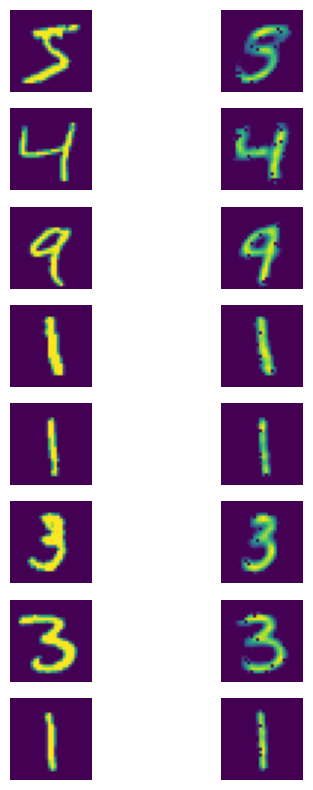

In [56]:
plt.figure(figsize=(5, 10))
for i in range(0, 16, 2):
    plt.subplot(8, 2, i + 1)
    plt.imshow(X[i].reshape(28, 28), )
    plt.axis('off')
    plt.subplot(8, 2, i + 2)
    plt.imshow(pred[i].reshape(28, 28), )
    plt.axis('off')
plt.show()

En la figura, la columna de la izquierda es la imagen original y la de la derecha es la reconstruida usando los datos del espacio latente. Podemos ver que en general coinciden las reconstrucciones con los originales, pero se pueden ver que algunos pixeles se pierden. 

Esto nos dice que la información contenida en la reducción es suficiente para una buena reconstrucción. 

A continuación vamos a usar una reducción a 2 dimensiones para luego graficarla en el plano. Note que usamos un learning rate diferente y entrenamos por 40 epochs.

In [4]:
latent_dim = 2
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(latent_dim, activation='relu', name='latent_layer'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(784, activation='relu'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
model.fit(X, X, epochs=40, batch_size=256)

Epoch 1/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3181.5081
Epoch 2/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3156.5073
Epoch 3/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3129.7554
Epoch 4/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3120.1482
Epoch 5/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3090.3901
Epoch 6/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3073.7473
Epoch 7/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3080.6035
Epoch 8/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3031.1846
Epoch 9/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3011.9346
Epoch 10/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2998.7258
Epoch 11/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2995.1233
Epoch 12/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2983.1006
Epoch 13/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2983.9548
Epoch 14/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2997.8896
Epoch 15/40
274

Mostramos las imágenes reconstruidas. Se puede apreciar que las reconstrucciones se parecen a las originales.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


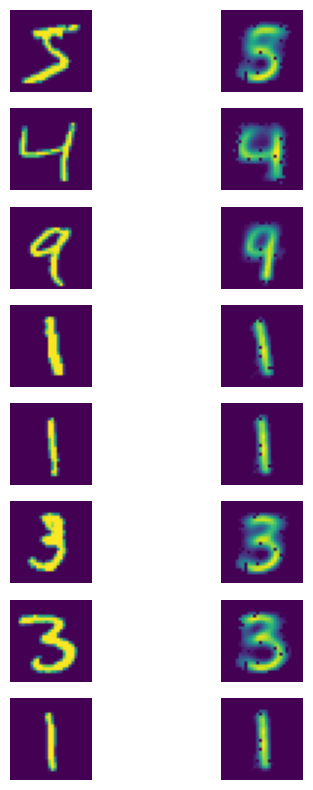

In [7]:
pred = model.predict(X[0:16])
plt.figure(figsize=(5, 10))
for i in range(0, 16, 2):
    plt.subplot(8, 2, i + 1)
    plt.imshow(X[i].reshape(28, 28), )
    plt.axis('off')
    plt.subplot(8, 2, i + 2)
    plt.imshow(pred[i].reshape(28, 28), )
    plt.axis('off')
plt.show()

Con la siguiente instrucción creamos el modelo `reductor_model` que lo único que hace es tomar la parte del codificador. Con esto, la salida es la reducción del espacio latente.

In [8]:
reductor_model = models.Model(inputs=model.inputs, outputs=model.get_layer('latent_layer').output)

Aplicamos el codificador a los datos para obtener la reducción a dos dimensiones y lo guardamos en `X_t`.

In [9]:
X_t = reductor_model.predict(X)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(32, 784))
  warnings.warn(msg)


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


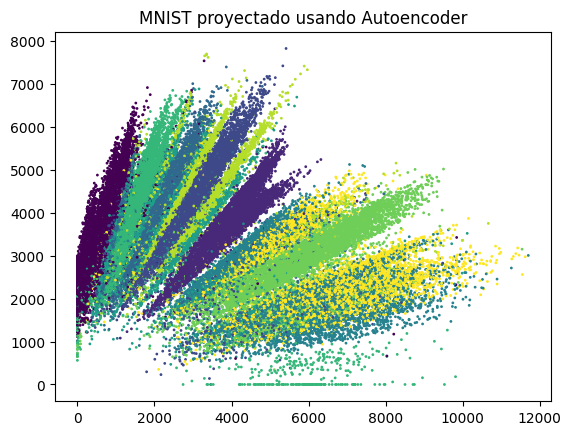

In [10]:
plt.scatter(X_t[:, 0], X_t[:, 1], c=y, s=1)
plt.title("MNIST proyectado usando Autoencoder")
plt.show()

Esta es la reducción del conjunto de datos a dos dimensiones. Podemos ver que los datos se agrupan por color pero hay una zona donde se revuelen las imágenes de 2 clases.